In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_data.csv", usecols=['overall'])


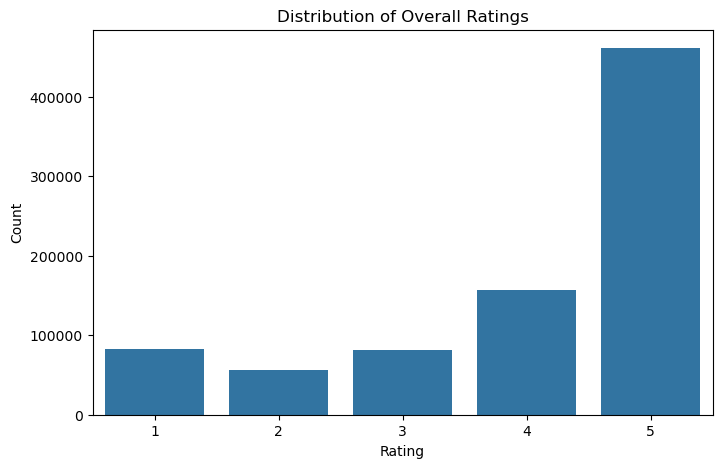

overall
1     9.887430
2     6.765171
3     9.683483
4    18.656072
5    55.007843
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(8,5))

sns.countplot(x='overall', data=df, order=sorted(df['overall'].unique()))

plt.title("Distribution of Overall Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.show()

# درصد هر کلاس
percentages = df['overall'].value_counts(normalize=True).sort_index() * 100
print(percentages)


In [5]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(df['overall'])

weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=df['overall']
)

class_weights = dict(zip(classes, weights))
print(class_weights)


{1: 2.0227703435804703, 2: 2.9563182747198535, 3: 2.0653725427442486, 4: 1.072037006274199, 5: 0.3635845152063447}


### 1. بررسی توزیع متغیر هدف

در این بخش توزیع امتیازهای کاربران بررسی شد. نتایج نشان می‌دهد که داده‌ها به‌شدت نامتوازن هستند و بیش از ۵۵٪ نمونه‌ها مربوط به امتیاز ۵ می‌باشند.

### 2. اثر نامتوازن بودن داده

چنین توزیعی می‌تواند باعث شود مدل به سمت کلاس‌های پرتکرار متمایل شود و عملکرد ضعیفی روی کلاس‌های کم‌تعداد داشته باشد.

### 3. راهکار پیشنهادی

برای کاهش اثر این عدم توازن، وزن کلاس‌ها بر اساس فراوانی آن‌ها محاسبه شد و در مرحله آموزش مدل مورد استفاده قرار خواهد گرفت.
